# Part 4.0  Intro to Scikit-Learn (sklearn)

## About the instructor: 
    
Dr Vijayakumar

AIRASIA ACADEMY,

vijaymmu@gmail.com

## Getting Started


Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

Please read the [User Guide](https://scikit-learn.org/stable/user_guide.html#user-guide).

### Scikit-Learn estimator Application Programming Interface(API)


Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

## Simple linear regression - for Regression Problem

This example is used  to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, the residual sum of squares and the coefficient of determination are also calculated.

### 1. Choosing a class of a model
       from sklearn.linear_model import LinearRegression
### 2. Choosing model hyperparameters

*Parameters are the configuration model, which are internal to the model. Hyperparameters are the explicitly specified parameters that control the training process. Parameters are essential for making predictions. Hyperparameters are essential for optimizing the model.*

Ref for hyperparameters:  https://www.youtube.com/watch?v=4ILCOqJ7kHI


Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [ ]:
model = LinearRegression()
model

LinearRegression()

### Example

Observe the [_Student Performance Dataset_]) 

Get the reference at [here](https://archive.ics.uci.edu/ml/datasets/student+performance)

_This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008](http://www3.dsi.uminho.pt/pcortez/student.pdf), the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details)._



Explore the data and find out the answers for the following questions:
- Is there a relationship between studytime and grades? How strong is that relationship?
- Is there a relationship between traveltime and grades? How strong is that relationship?
- What is the relationship between studytime & traveltime, and grades? 
- Given a studytime and/or traveltime, can the grades be predicted?


In [ ]:
# read data into a DataFrame
import pandas as pd
data = pd.read_csv('student_mat.csv', sep=';')
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# if you want to save the dataset as a new csv file
data.to_csv("student_mat_sep.csv",sep=",")

In [ ]:
data.corr()['G3']

age          -0.161579
Medu          0.217147
Fedu          0.152457
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [ ]:
data.studytime.head()

0    2
1    2
2    2
3    3
4    2
Name: studytime, dtype: int64

#### Your codes:

In [ ]:
# Testing part 1 of code

import pandas as pd
data = pd.read_csv('student_mat.csv', sep=';')


X1 = pd.DataFrame(data['studytime'])
y1 = data['G3']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # 75% of data is used here for training
y1_pred = model.predict(X_test) # 25% of data is used here for training

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"RMSE: {(mean_squared_error(y_test, y1_pred))**0.5}")
print(f"R^2: {r2_score(y_test, y1_pred):.4f}")

RMSE: 5.4334036865139685
R^2: -0.0429


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y1_pred, color='blue', linewidth=1) # change color and line thickness
plt.xlabel("Study Time")
plt.ylabel("G3 Result")

plt.title('G3 result vs Study Time')
plt.show()

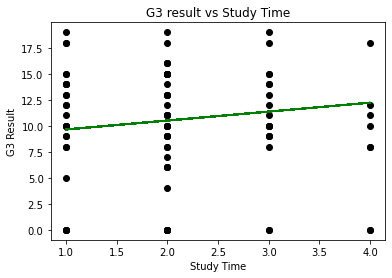

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y1_pred, color='green', linewidth=1.5)
plt.xlabel("Study Time")
plt.ylabel("G3 Result")

plt.title('G3 result vs Study Time')
plt.show()

RMSE: 5.4334036865139685
R^2: -0.0429


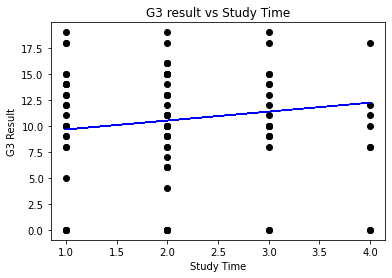

In [ ]:
# Write your codes here

import pandas as pd
data = pd.read_csv('student_mat.csv', sep=';')


X1 = pd.DataFrame(data['studytime'])
y1 = data['G3']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) 
y1_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score

print(f"RMSE: {(mean_squared_error(y_test, y1_pred))**0.5}")
print(f"R^2: {r2_score(y_test, y1_pred):.4f}")

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y1_pred, color='blue', linewidth=1)
plt.xlabel("Study Time")
plt.ylabel("G3 Result")

plt.title('G3 result vs Study Time')
plt.show()

In [ ]:
model.coef_

array([0.85961057])

In [ ]:
model.intercept_

8.793759718747888

In [ ]:
# Write your code here

X2 = pd.DataFrame(data.traveltime)
y2 = data.G3


X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.25,random_state=0)

model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train) 
y2_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score

print(f"RMSE: {(mean_squared_error(y_test, y2_pred))**0.5}.")
print(f"R^2: {r2_score(y_test, y2_pred):.4f}")

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y2_pred, color='blue', linewidth=1)
plt.xlabel("Travel Time")
plt.ylabel("G3 Result")

plt.title('G3 result vs Travel Time')
plt.show()

RMSE: 5.462540472299975.
R^2: -0.0541


In [ ]:
X3 = data[["G1","G2"]]
y3 = data.G3


X_train,X_test,y_train,y_test=train_test_split(X3,y3,test_size=0.25,random_state=0)

model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train) 
y3_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score

print(f"RMSE: {(mean_squared_error(y_test, y3_pred))**0.5}")
print(f"R^2: {r2_score(y_test, y3_pred):.4f}")

RMSE: 2.5062772304013703
R^2: 0.7781


In [ ]:
X3
# Download student_mat_sep.csv into your own computer then view columns containing G1, G2 and G3 
# using excel
# Check if there is any row which contains G1=8, G2=10 and the corresponding G3

G1  G2
0     5   6
1     5   5
2     7   8
3    15  14
4     6  10
..   ..  ..
390   9   9
391  14  16
392  10   8
393  11  12
394   8   9

[395 rows x 2 columns]

In [ ]:
new_X = [[8, 10]]
new_pred = model.predict(new_X)
new_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([9.57150772])

In [ ]:
X4 = data[["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "goout"]]
y4 = data.G3

X_train,X_test,y_train,y_test=train_test_split(X4, y4, test_size=0.25, random_state=0)

model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train) 
y4_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score

print(f"RMSE: {(mean_squared_error(y_test, y4_pred))**0.5}")
print(f"R^2: {r2_score(y_test, y4_pred):.4f}")

RMSE: 5.059113630199241
R^2: 0.0959


## Logistic Regression (for classification)

Refer to the following link for more information:

[Examples using sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#examples-using-sklearn-linear-model-logisticregression)

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.



### Logistic Regression Assumptions

- Binary logistic regression requires the dependent variable to be binary.
- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
- Only the meaningful variables should be included.
- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
- The independent variables are linearly related to the log odds.
- Logistic regression requires quite large sample sizes.


### Example

Let's first load the required [Pima Indian Diabetes dataset](https://drive.google.com/file/d/1T75Zy7GykBmxuKyQXkIIsGlKvyJjjpUH/view?usp=sharing) using the pandas' read CSV function.  
For more details, you may refer to [HERE](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

#### Loading Data



In [ ]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [ ]:
col_names


['pregnant',
 'glucose',
 'bp',
 'skin',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [ ]:
pima.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

#### Selecting Feature

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

#### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function `train_test_split()`. You need to pass 3 parameters `features`, `target`, and `test_set size`. Additionally, you can use `random_state` to select records randomly.

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Model Development and Prediction

In [ ]:
# Your codes
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train) # training (learning step)

y_pred = model.predict(X_test) # testing (examination)

# y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Model Evaluation using Confusion Matrix
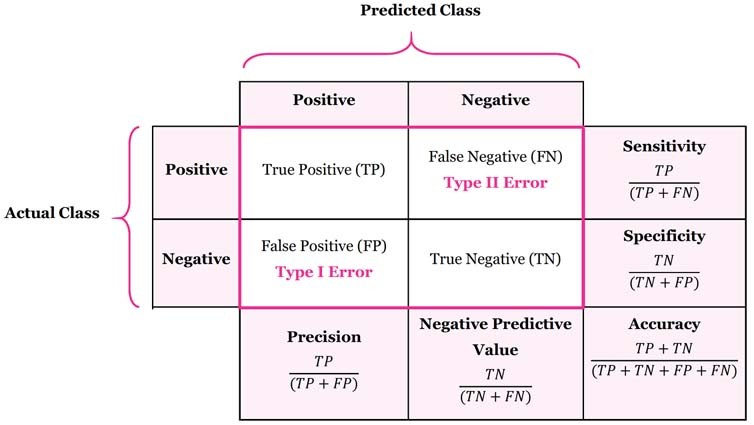
ConfusionMatrix1.png


ConfusionMatrix2.JPG

# Accuracy <br>
The classification accuracy rate measures how often the model makes a correct prediction. It can be calculated as the ratio of the number of correct predictions and the total number of predictions made by the classifiers. <br>

It is calculated using the following formula: <br>

Accuracy = (TP + TN)/ (TP + FP + FN + TN) <br>

Reference: https://rapidminer.com/glossary/confusion-matrix/

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

In [ ]:
pd.crosstab(y_test, y_pred, 
            rownames = ['Actual'], 
            colnames =['Predicted'], 
            margins = True)

Predicted    0   1  All
Actual                 
0          117  13  130
1           24  38   62
All        141  51  192

accuracy.JPG

In [ ]:
# Accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8072916666666666

In [ ]:
# Precision

from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7450980392156863

In [ ]:
# Recall

from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6129032258064516

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
#F-measure = (2* Recall*Precision)/ (Recall + Precision) 

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       130
           1       0.75      0.61      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.80      0.81      0.80       192



## Exercise 1
Try to improve the f1-score in classification report for class '1'. You may do the following:
1. Use a correlation matrix/heatmap to find out what features are more significant to the label/outcome. (If you have forgotten about correlation, then trial and error with different combination of X.)
1. Remove rows with suspicious data (e.g. value 0).

## Exercise 2

By using the `student_mat.csv` as the data, apply logistic regression model and observe the classification report. 

Note: categorize the G3 as a nominal variable, where

```
G3 >= 10 --> Pass
G3 < 10  --> Fail

```

You may also apply one hot encoder or label encoder to the categorical variables (X). 

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('student_mat.csv', sep=';')
df['G3_cat'] = np.where(df['G3'] >= 10, '1', '0')  # 1 = Pass, 0 = Fail
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 G3_cat  
0        3     4     1     1       3        6   5   6   6      0  
1        3     3     1     1       3        4   5   5   6      0  
2        3     2     2     3       3       10   7   8  10      1  
3        2     2     1     1       5        2  15  14  15      1  
4        3     2     1     2       5        4   6  10  10      1  

[5 rows x 34 columns]